# Gravity disturbance inside a prism

The difference between the observed gravity (corrected from non-gravitational effects due to the vehicle motion) and the normal gravity, at the same point, is called *gravity disturbance* and is a very-well established quantity in geodesy (Hofmann-Wellenhof and Moritz, 2005). Several authors have discussed the differences between *gravity anomaly* and *gravity disturbance*, as well as proposed that the second is more appropriated for geophysical applications (e.g., Li and Götze, 2001; Fairhead et al., 2003; Hackney and Featherstone, 2003; Hinze et al., 2005; Vajda et al., 2006, 2007, 2008). The *gravity disturbance* approximates the gravitational field produced by contrasts between the actual internal density distribution of the Earth and the unknown internal density distribution of the normal Earth. In applied geophysics, these density differences are generally called *anomalous masses* (e.g., Hammer, 1945; LaFehr, 1965) or *gravity sources* (e.g., Blakely, 1996).

This code illustrates how to compute the *gravity disturbance* produced by a homogeneous rectangular prism at points occupied by mass. We presume that the *gravity disturbance* can be approximated by the vertical component of the gravitational attraction produced by the prism.

**Note:** Find all cited references at [`references.md`](https://github.com/birocoles/gravmag/blob/main/references.md).

### Things we have to import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gravmag.models import rectangular_prism as rp
from gravmag import plot_functions as plf

### Model

In [2]:
# Create a model formed by a single prism
model = np.array([[-500, 500, -700, 800, 10, 1010]])

density = np.array([2000]) # 2000 kg/m³ = 2 g/cm³

In [3]:
# Define the coordinate z of the plane crossing the model
z_cross = 200

In [4]:
# Split the previous model into two parts
# The prism above and below the plane z_cros are called 
# model_up and model_down, respectively
model_up = np.array([[-500, 500, -700, 800, 10, z_cross]])
model_down = np.array([[-500, 500, -700, 800, z_cross, 1010]])

In [5]:
# Create a mirror of model_up
model_up_mirror = np.array([[-500, 500, -700, 800, z_cross, z_cross + (z_cross - 10)]])

### Points were we compute the synthetic data

In [6]:
# number of points along x and y
shape = (100, 100)

# minimum x, maximum x, minimum y and maximum y
area = [-5000, 5000, -4000, 6000]

# coordinates 
xp = np.linspace(area[0], area[1], shape[0])
yp = np.linspace(area[2], area[3], shape[1])
yp, xp = np.meshgrid(yp, xp)

yp = np.ravel(yp)
xp = np.ravel(xp)
zp = np.zeros_like(yp) + z_cross

coordinates = np.vstack([xp, yp, zp])

### Synthetic gravity disturbance (in mGal)

In [7]:
# Compute the vertical component of acceleration
gz = rp.grav(coordinates=coordinates, prisms=model, density=density, field='z')

In [8]:
# Compute the effect produce by the two models
gz_up = rp.grav(coordinates=coordinates, prisms=model_up, density=density, field='z')
gz_down = rp.grav(coordinates=coordinates, prisms=model_down, density=density, field='z')

In [9]:
# Compute the effect produce by the two models
gz_up_mirror = rp.grav(coordinates=coordinates, prisms=model_up_mirror, density=-density, field='z')

### Plot the computed gravity disturbance

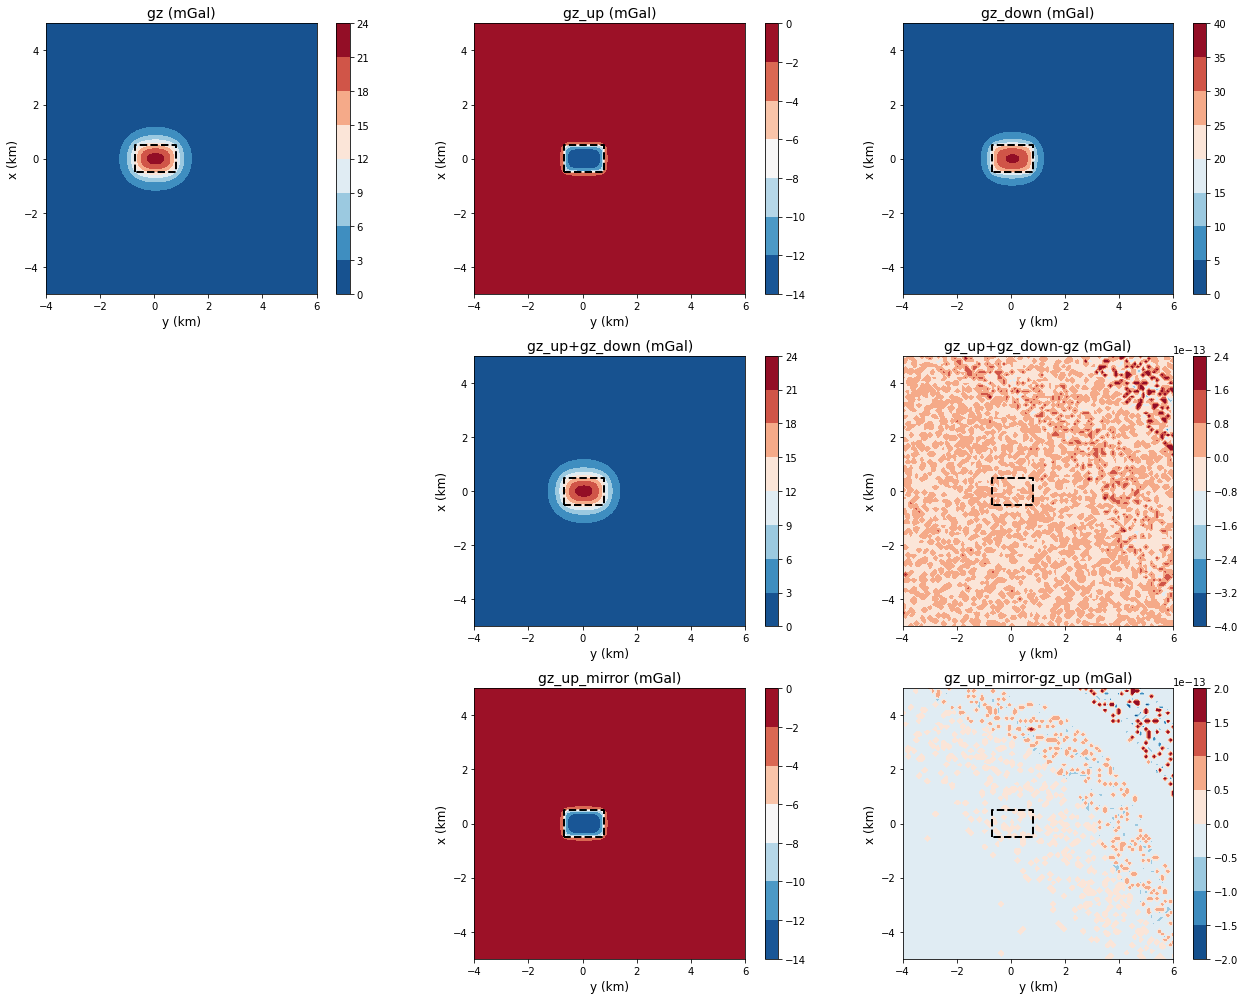

In [10]:
fields = [gz, gz_up, gz_down, 
          gz_up+gz_down, gz_up+gz_down-gz, 
          gz_up_mirror, gz_up_mirror - gz_up]
windows = [1, 2, 3, 5, 6, 8, 9]
titles = ['gz (mGal)', 'gz_up (mGal)', 'gz_down (mGal)', 
          'gz_up+gz_down (mGal)', 'gz_up+gz_down-gz (mGal)',
          'gz_up_mirror (mGal)', 'gz_up_mirror-gz_up (mGal)']

plt.figure(figsize=(18,14))

for w, window in enumerate(windows):

    plt.subplot(3,3,window)
    plt.title(titles[w], fontsize=14)
    plt.axis('scaled')
    plt.contourf(yp.reshape(shape)*0.001, 
                 xp.reshape(shape)*0.001, 
                 fields[w].reshape(shape), cmap='RdBu_r')
    plt.colorbar()
    plf.model_boundaries(model, m2km=True)
    plt.ylim(0.001*area[0], 0.001*area[1])
    plt.xlim(0.001*area[2], 0.001*area[3])
    plt.ylabel('x (km)', fontsize=12)
    plt.xlabel('y (km)', fontsize=12)

plt.tight_layout()

plt.show()